In [1]:
import pandas as pd
import itertools
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
buildings_all = pd.read_csv("original_data/PublicLEEDProjectDirectory.csv", skiprows=3, encoding="ISO-8859-1")
buildings_all = buildings_all[buildings_all['Isconfidential'] == 'No']
buildings_2009 = buildings_all[buildings_all["LEEDSystemVersionDisplayName"] == "LEED-NC v2009"] 

/Users/trippshealy/Gdrive/research/leed_countries/.direnv/python-3.4.3/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [3]:
def my_filter_2009(df):
    countries = df.dropna(subset = ['PointsAchieved'])
    countries['PointsAchieved'] = countries['PointsAchieved'].convert_objects(convert_numeric=True)
    countries = countries[countries['PointsAchieved'] > 39]
    return(countries)

In [4]:
filtered = my_filter_2009(buildings_2009)

/Users/trippshealy/Gdrive/research/leed_countries/.direnv/python-3.4.3/lib/python3.4/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [5]:
turkey = filtered[filtered['Country'] == 'TR']

In [6]:
turkey.shape

(59, 19)

In [7]:
turkey.head()

,ID,Isconfidential,ProjectName,Street,City,State,Zipcode,Country,LEEDSystemVersionDisplayName,PointsAchieved,CertLevel,CertDate,IsCertified,OwnerTypes,GrossSqFoot,TotalPropArea,ProjectTypes,OwnerOrganization,RegistrationDate
55451,1000002781,No,HILTON GARDEN INN ISTANBUL GOLDEN HORN,Dutluk Sokak,Istanbul,Istanbul,34445,TR,LEED-NC v2009,65,Gold,5/30/12 0:00,Yes,"Investor: REIT, Publicly traded",193750.0,38580,"Lodging: Hotel/Motel/Resort, Full Service",Amplio Istanbul Hotel Yatirim,12/2/09 0:00
55524,1000002878,No,SABANCI UNIVERSITY NANOTECHNOLOGY CENTER,Sabanci University Campus,Istanbul,Istanbul,34956,TR,LEED-NC v2009,79,Gold,10/28/11 0:00,Yes,"Educational: College, Private",76826.4,106868,Laboratory,Sabanci University,12/7/09 0:00
55568,1000002936,No,SCHNEIDER ELECTRIC TRANSFORMER FACTORY,TOSB Cayirova Kocaeli,Kocaeli,Kocaeli,41480,TR,LEED-NC v2009,61,Gold,9/12/11 0:00,Yes,Corporate: Privately Held,368011.0,749276,Industrial Manufacturing,SCHNEIDER ENERGY INDUSTRY A.S.,12/9/09 0:00
55722,1000003136,No,THY TEKNIK HABOM,Sabiha Gokcen Havalimani,Pendik,Istanbul,34912,TR,LEED-NC v2009,70,Gold,1/15/15 0:00,Yes,NaN,4306403.5,2315500,Industrial Manufacturing,THY Teknik,12/16/09 0:00
55980,1000003448,No,Li Fung Centre,Yenibosna,Istanbul,Istanbul,34550,TR,LEED-NC v2009,54,Silver,7/17/11 0:00,Yes,Corporate: Privately Held,86013.0,184290,Office: Administrative/Professional,Li Fung,12/25/09 0:00


In [11]:
turkey.groupby('ProjectTypes').count()['ID']

ProjectTypes
Core Learning Space: College/University              6
Core Learning Space: Other classroom education       1
Industrial Manufacturing                             9
Laboratory                                           2
Lodging: Dormitory                                   1
Lodging: Hotel/Motel/Resort, Full Service            5
Lodging: Hotel/Motel/Resort, Select Service          2
Lodging: Inn                                         1
Multi-Family Residential: Apartment                  3
Multi-Family Residential: Condominium                5
Office: Administrative/Professional                 10
Office: Government                                   1
Office: Mixed-Use                                    2
Office: Other Office                                 2
Public Assembly: Other Assembly                      3
Public Assembly: Recreation                          1
Public Assembly: Social/Meeting                      1
Service: Other Service                              

In [12]:
turkey.groupby('OwnerTypes').count()['ID']

OwnerTypes
Community Development Corporation or Non     1
Corporate: Privately Held                   30
Corporate: Publicly Traded                   3
Educational: College, Private                2
Educational: College, Public                 1
Educational: University, Private             3
Government Use: Federal                      2
Government Use: Local, City                  1
Government Use: Local, County                2
Government Use: State                        2
Investor: Individual/Family                  1
Investor: REIT, Publicly traded              4
Non-Profit (that do not fit into other c     1
Name: ID, dtype: int64

In [17]:
turkey.GrossSqFoot.dropna()

55451     193750.00
55524      76826.40
55568     368011.00
55722    4306403.50
55980      86013.00
56020      75039.00
56666     327896.84
58487      71683.60
59412      17243.00
60089     406313.80
60401       3550.80
60677      51408.76
61203     223986.00
61272     113041.97
62045     363982.00
63332     129196.50
63426      52189.58
63739      65528.74
66772     248382.60
67513      20897.85
67580      29502.00
70096     235882.26
71409     767800.46
71610     238237.00
71676     181674.00
73008     208600.00
73158     177300.00
73159     714209.85
73160     372302.56
74071      35596.00
74336     528777.00
74546     505144.00
74547      90061.10
75102     373270.00
76121     344736.39
76125     204582.64
76424     447943.04
76492    2071837.00
76654       3735.00
77194      40316.00
77431      29435.77
77803      88060.00
77817       6373.10
78615     188239.10
78751    1075831.00
79131     310312.50
79378      48486.00
79670      30795.00
80022      35587.00
81863      54500.00


In [19]:
turkey_property = turkey.loc[:, ['GrossSqFoot', 'TotalPropArea']].dropna()

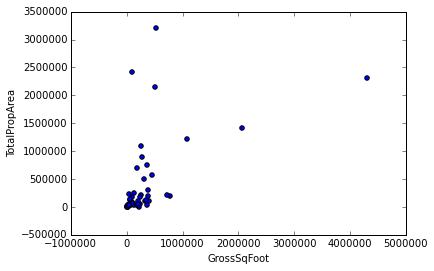

In [22]:
turkey_property.plot(kind='scatter', x='GrossSqFoot', y='TotalPropArea')

## Normal Distribution of scores for private companies 

In [24]:
def filter_owner(df):
    return(df[df["OwnerTypes"] == 'Corporate: Privately Held'])

In [25]:
turkey_private = filter_owner(turkey)

In [29]:
import scipy.stats as stats

In [31]:
stats.normaltest(turkey_private.PointsAchieved)

NormaltestResult(statistic=4.0493412580840111, pvalue=0.13203732528688755)